<a href="https://colab.research.google.com/github/ks-chauhan/StudentOutcomePredictor/blob/main/DL_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Drive mount to Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm.auto import tqdm

In [3]:
# Loading dataset
data_path = "/content/drive/MyDrive/Gradious_Assignments/Mini_Project_ML/gradious_ML_mini_project.csv"
df = pd.read_csv(data_path)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# The values the given target can have
df['Outcome'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

### The given dataset has students data given and we have to predict whether a given student has droppedout or has graduated or is still enrolled in the course.

In [6]:
df.head()

,Marital_Status_Code,Application_Method,Application_Sequence,Program_ID,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,Mother's_Job_Category,Father's_Job_Category,Admission_Score,Student_Displacement_Flag,Special_Educational_Needs,Outstanding_Debts_Flag,Tuition_Fees_UpToDate_Flag,Gender_Code,Scholarship_Recipient_Flag,Enrollment_Age,International_Status,Credits_1st_Semester,Enrolled_1st_Semester,Evaluations_1st_Semester,Passed_1st_Semester,Grade_1st_Semester,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
# No null values
df.isna().sum()

,0
Marital_Status_Code,0
Application_Method,0
Application_Sequence,0
Program_ID,0
Attendance_Type,0
Prior_Qualification_Code,0
Prior_Qualification_Score,0
Nationality_Code,0
Mother's_Education_Level,0
Father's_Education_Level,0


In [8]:
# Checking Dataset Balance
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True))

Outcome
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Outcome
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


### The given dataset is unbalanced as the number of student entries that have graduated is 3 times of those who are still enrolled.

In [9]:

# Dropping Program ID as it is useless in predictions
df.drop(['Program_ID'], axis = 1, inplace = True)

In [10]:
# Encoding outcome with ordinal encoder as there is an order to our categories
def encoder(df):
  oe = OrdinalEncoder(categories=[['Dropout', 'Enrolled', 'Graduate']])
  df['Outcome'] = oe.fit_transform(df[['Outcome']])
  df['Outcome'] = df['Outcome'].astype('int')
  return df
df = encoder(df)

In [11]:
df.head()

,Marital_Status_Code,Application_Method,Application_Sequence,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,Mother's_Job_Category,Father's_Job_Category,Admission_Score,Student_Displacement_Flag,Special_Educational_Needs,Outstanding_Debts_Flag,Tuition_Fees_UpToDate_Flag,Gender_Code,Scholarship_Recipient_Flag,Enrollment_Age,International_Status,Credits_1st_Semester,Enrolled_1st_Semester,Evaluations_1st_Semester,Passed_1st_Semester,Grade_1st_Semester,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome
0,1,17,5,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


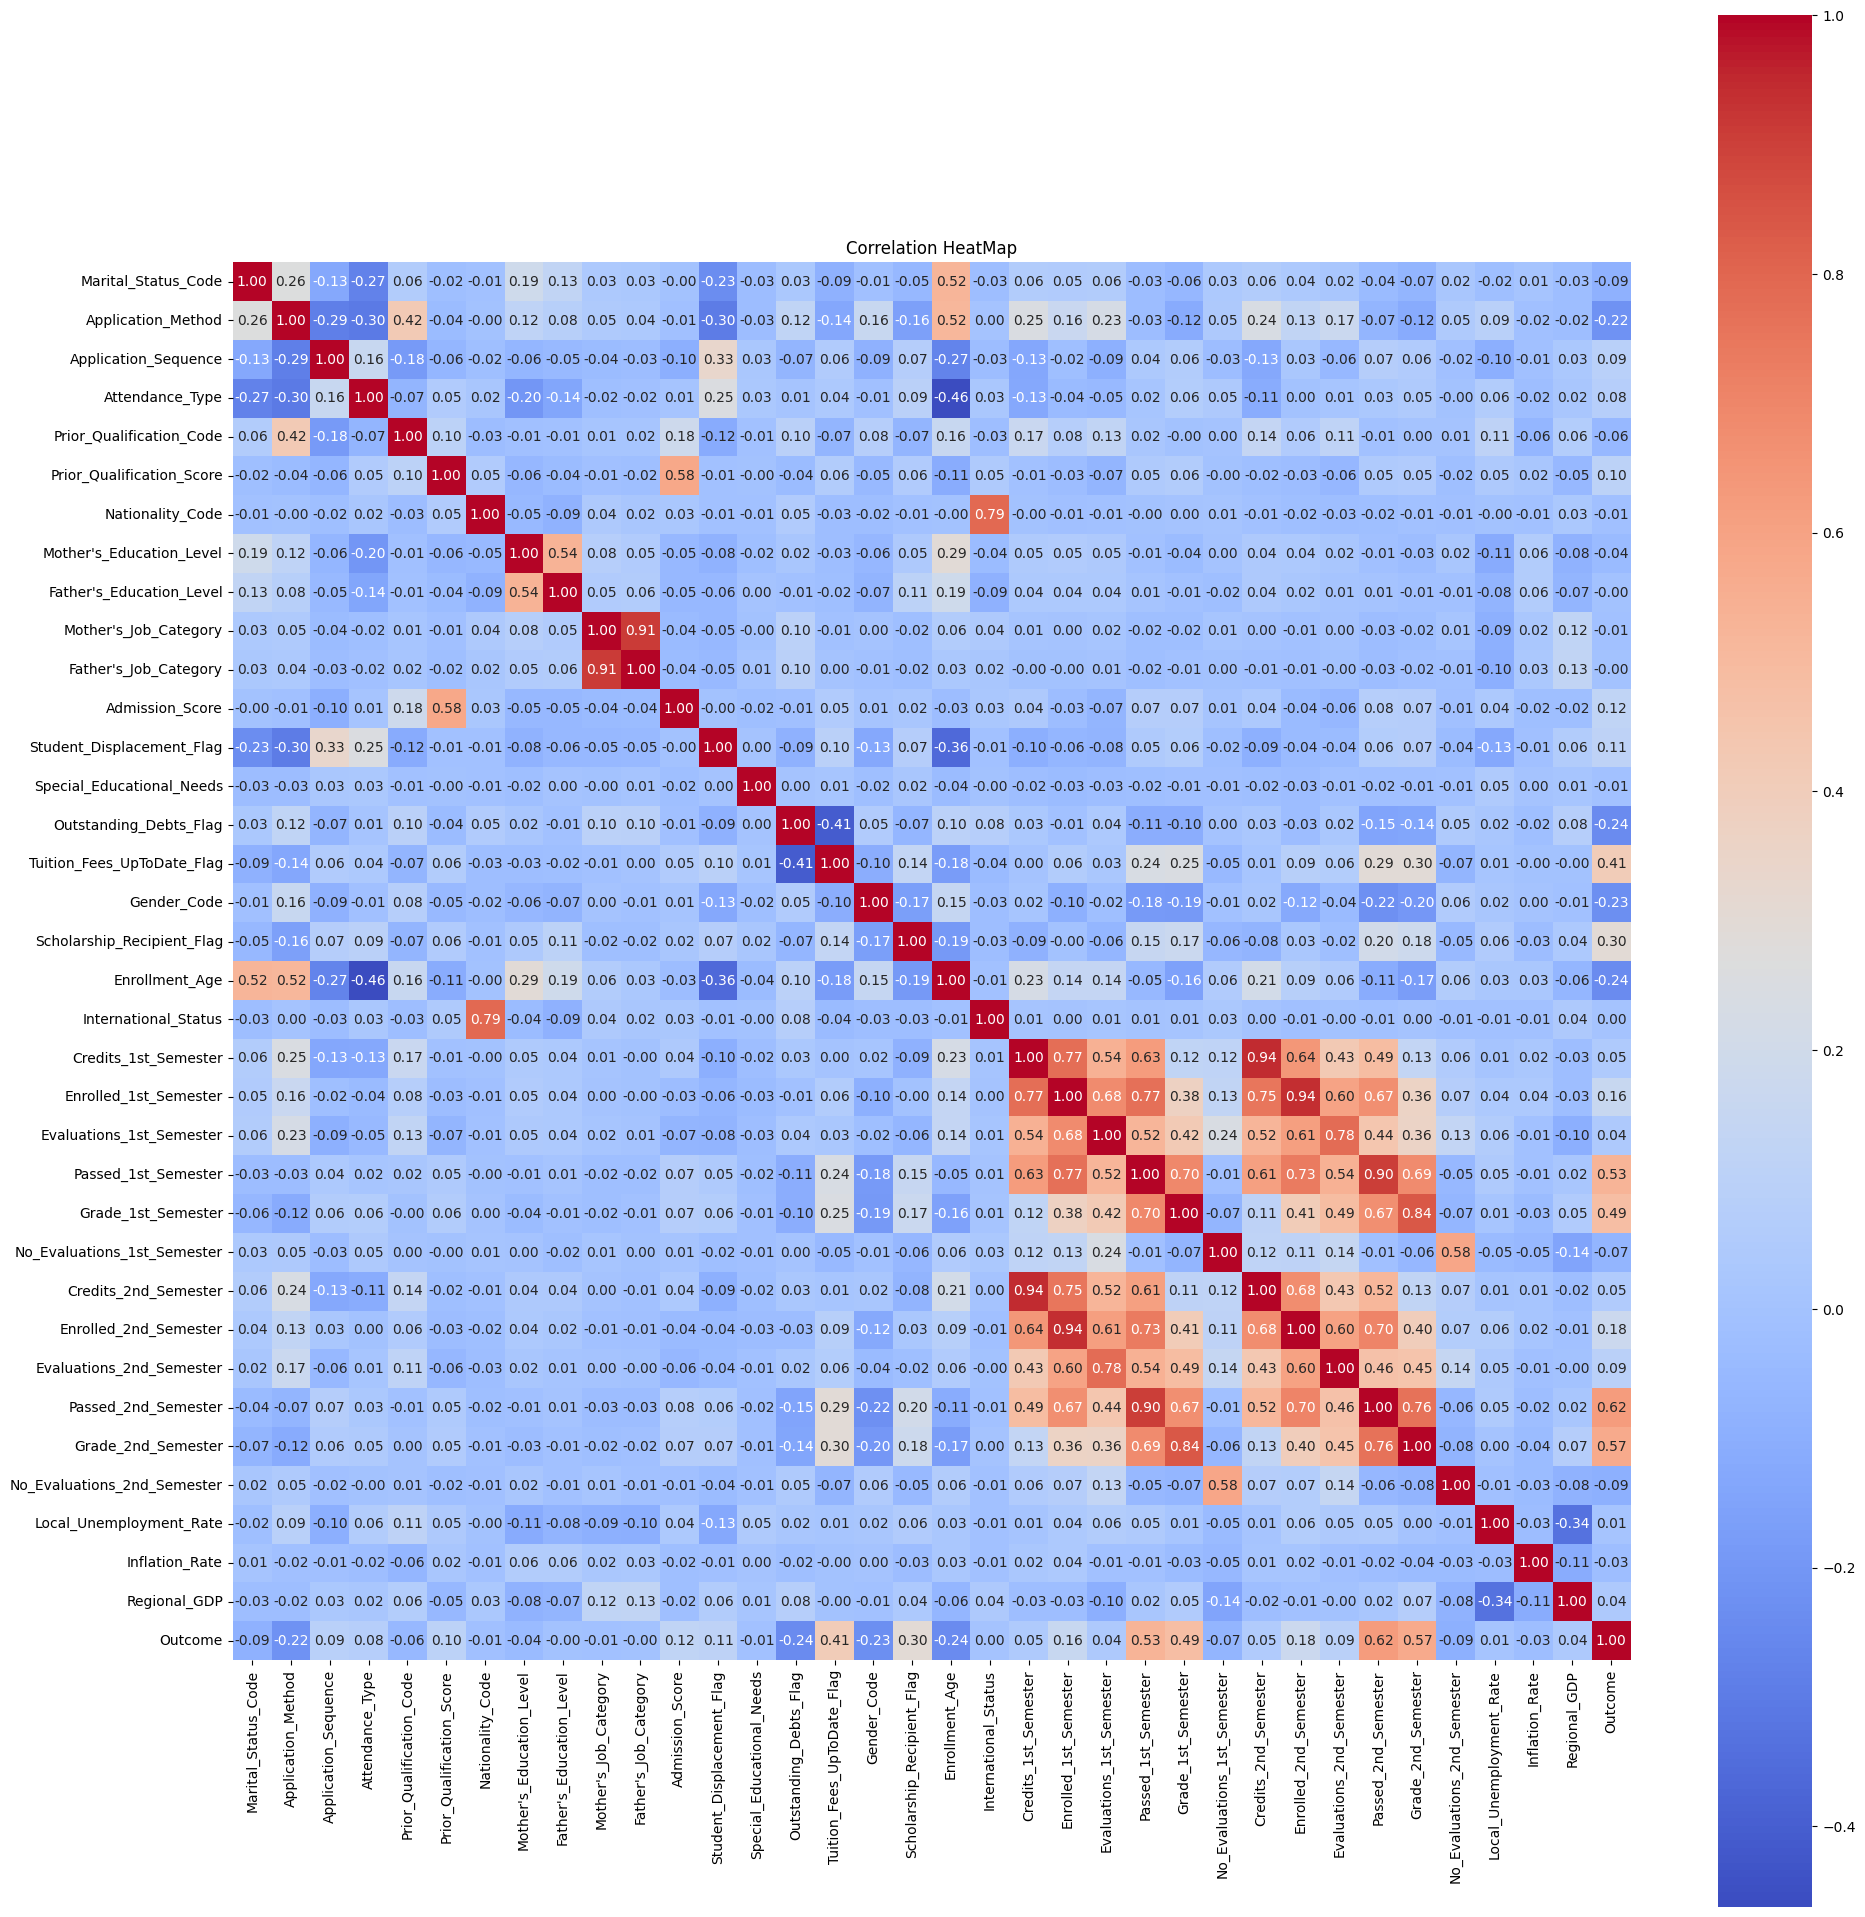

In [12]:
def correlation_plotting(df):
  corr = df.corr(numeric_only=True)
  plt.figure(figsize=(20, 20))
  sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
  plt.title("Correlation HeatMap")
  plt.tight_layout()
  plt.show()
  return corr

corr = correlation_plotting(df)

In [13]:
# Selected best features with a correlation of more than 0.1
def best_features(df, corr):
  target_corr = corr['Outcome']
  target_corr_sorted = target_corr.abs().sort_values(ascending=False)
  best_features = target_corr_sorted[target_corr_sorted > 0.1].index
  return best_features
best_features = best_features(df, corr)

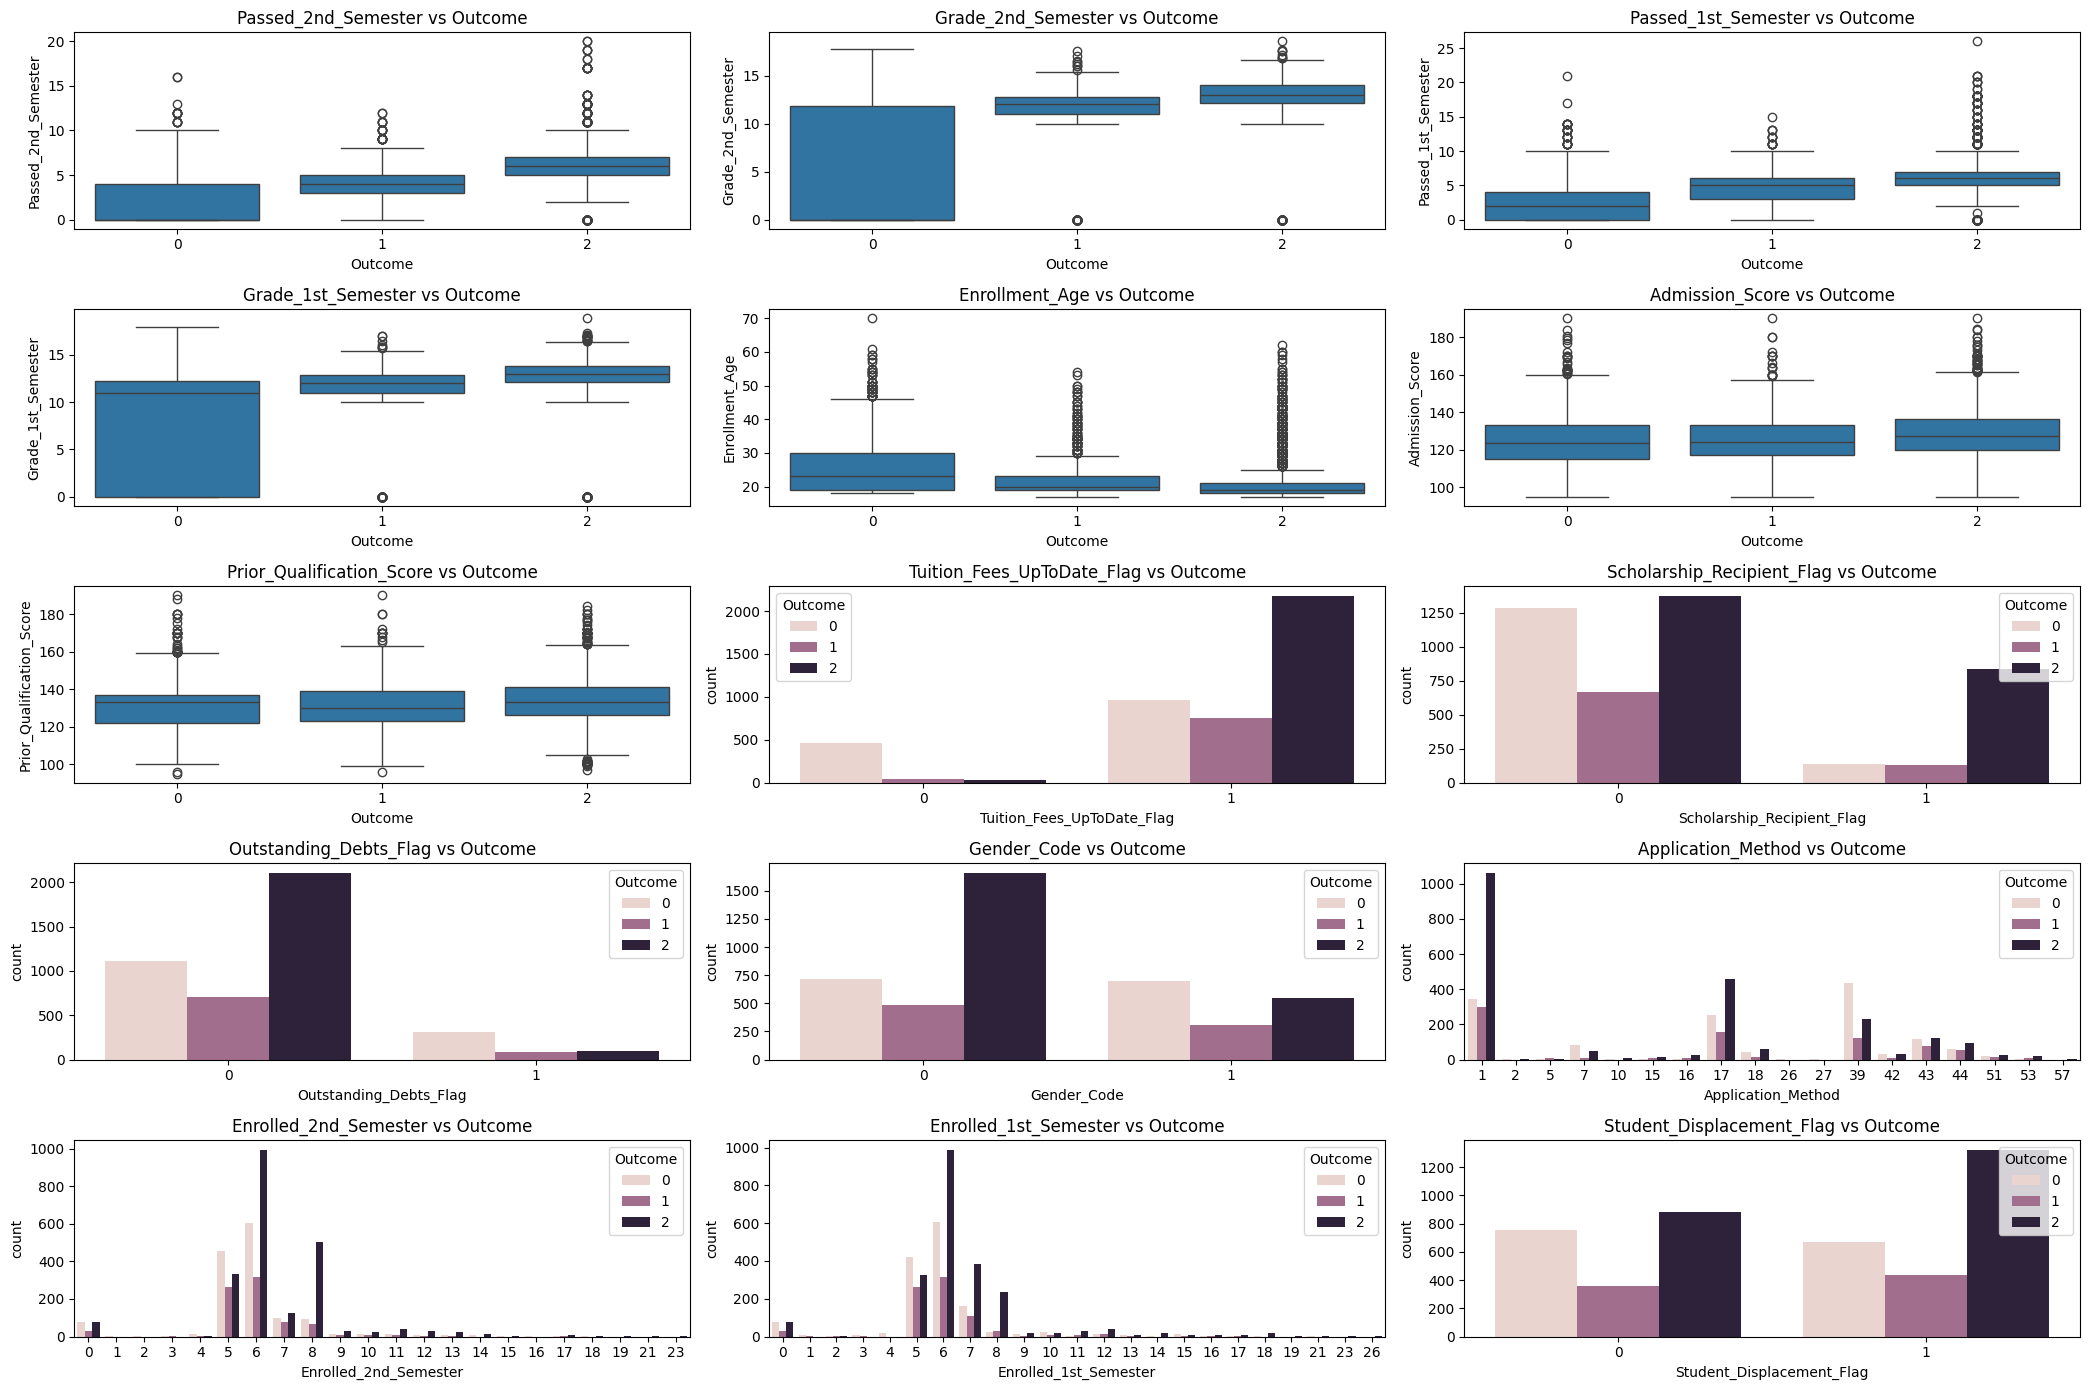

In [14]:
# Box Plots for numeric data columns vs Outcome
def box_plot(df, num_feats, cat_feats, rows=5, col=3):
  fig, axes = plt.subplots(rows, col, figsize=(21, 14))
  axes = axes.flatten()

  total_feats = num_feats+cat_feats
  for i,c in enumerate(total_feats):
    if c in num_feats:
      sns.boxplot(x = 'Outcome', y = c, data = df, ax = axes[i])
      plt.title(f'{c} vs Outcome')
    elif c in cat_feats:
      sns.countplot(x = c, hue = 'Outcome', data = df, ax = axes[i])
      plt.title(f'{c} vs Outcome')
    axes[i].set_title(f'{c} vs Outcome')
  plt.tight_layout()
  plt.show()


num_feats = ['Passed_2nd_Semester','Grade_2nd_Semester','Passed_1st_Semester',
             'Grade_1st_Semester','Enrollment_Age','Admission_Score','Prior_Qualification_Score']
cat_feats = ['Tuition_Fees_UpToDate_Flag','Scholarship_Recipient_Flag','Outstanding_Debts_Flag',
             'Gender_Code','Application_Method','Enrolled_2nd_Semester','Enrolled_1st_Semester',
             'Student_Displacement_Flag']
box_plot(df, num_feats, cat_feats)

In [15]:
# Feature Engineering over the most impactful features
def feature_engineering(df):
  """
  Input : DataFrame
  Output : New DataFrame with added new features"""
  df_fe = df.copy()
  # Average Grade across both the semesters
  df_fe['Overall_Grade'] = (df_fe['Grade_1st_Semester'] + df_fe['Grade_2nd_Semester']) / 2
  # upword or downward grade
  df_fe['Grade_Improvement'] = df_fe['Grade_2nd_Semester'] - df_fe['Grade_1st_Semester']
  # How many semester passed successfully
  df_fe['Sems_Passed'] = (df_fe['Passed_1st_Semester'] + df_fe['Passed_2nd_Semester']) / 2
  # Total Credits Enrolled in
  df_fe['Total_Credits'] = df_fe['Enrolled_1st_Semester'] + df_fe['Enrolled_2nd_Semester']
  # Grouping age into categories
  df_fe['Age_Group'] = pd.cut(df_fe['Enrollment_Age'], bins = [0, 20, 23, 100], labels = ['<20', '20-23', '24+'])
  # Financial Indicators
  df_fe['Tuition_Fees_Flag'] = ((df_fe['Tuition_Fees_UpToDate_Flag'] == 0) | (df_fe['Outstanding_Debts_Flag'] == 1)).astype(int)

  return df_fe

In [16]:
# Function to clip numeric data
def clip_outliers(df, cols = None):
  df_co = df.copy()
  if cols is None:
    cols = df_co.select_dtypes(include='number').columns
  for c in cols:
    q1, q3 = df_co[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df_co[c] = df_co[c].clip(lower, upper)
  return df_co

In [17]:
df_fe = feature_engineering(df)

In [18]:
df_fe.head()

,Marital_Status_Code,Application_Method,Application_Sequence,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,Mother's_Job_Category,Father's_Job_Category,Admission_Score,Student_Displacement_Flag,Special_Educational_Needs,Outstanding_Debts_Flag,Tuition_Fees_UpToDate_Flag,Gender_Code,Scholarship_Recipient_Flag,Enrollment_Age,International_Status,Credits_1st_Semester,Enrolled_1st_Semester,Evaluations_1st_Semester,Passed_1st_Semester,Grade_1st_Semester,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome,Overall_Grade,Grade_Improvement,Sems_Passed,Total_Credits,Age_Group,Tuition_Fees_Flag
0,1,17,5,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000,0.000000,0.0,0,<20,0
1,1,15,1,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2,13.833333,-0.333333,6.0,12,<20,1
2,1,1,5,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000,0.000000,0.0,12,<20,1
3,1,17,2,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,12.914286,-1.028571,5.5,12,<20,0
4,2,39,1,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2,12.666667,0.666667,5.5,12,24+,0


In [19]:
def scaler_encoder(df, num_cols):
  # clipping data for scaling numerical features
  df_clean = clip_outliers(df_fe, cols = num_cols)

  # Scaling with Standard Scaler our numerical features
  scaler = StandardScaler()
  df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

  # Encoding Age Group
  df_clean['Age_Group'] = df_clean['Age_Group'].map({'<20': 0, '20-23': 1, '24+': 2})

  return df_clean

# Total numerical columns
num_cols = [
    'Passed_2nd_Semester','Grade_2nd_Semester','Passed_1st_Semester',
    'Grade_1st_Semester','Enrollment_Age','Admission_Score',
    'Prior_Qualification_Score','Overall_Grade','Grade_Improvement',
    'Sems_Passed','Total_Credits', 'Application_Method', 'Mother\'s_Education_Level', 'Application_Sequence', 'Father\'s_Education_Level',
    'Mother\'s_Job_Category', 'Father\'s_Job_Category', 'Local_Unemployment_Rate', 'Enrolled_2nd_Semester', 'Evaluations_2nd_Semester',
    'Enrolled_1st_Semester', 'Evaluations_1st_Semester', 'Credits_1st_Semester', 'Credits_2nd_Semester', 'Prior_Qualification_Code'
]

df_clean = scaler_encoder(df_fe, num_cols)

In [20]:
df_clean.head()

,Marital_Status_Code,Application_Method,Application_Sequence,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,Mother's_Job_Category,Father's_Job_Category,Admission_Score,Student_Displacement_Flag,Special_Educational_Needs,Outstanding_Debts_Flag,Tuition_Fees_UpToDate_Flag,Gender_Code,Scholarship_Recipient_Flag,Enrollment_Age,International_Status,Credits_1st_Semester,Enrolled_1st_Semester,Evaluations_1st_Semester,Passed_1st_Semester,Grade_1st_Semester,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome,Overall_Grade,Grade_Improvement,Sems_Passed,Total_Credits,Age_Group,Tuition_Fees_Flag
0,1,-0.095470,2.102099,1,0.0,-0.834072,1,-0.036018,-0.669778,-0.359174,0.718974,0.035097,1,0,0,1,1,0,-0.454236,0,0.0,-2.627684,-2.215381,-1.681426,-1.923650,0,0.0,-2.644763,-2.165664,-1.511364,-1.786401,0,-0.287638,1.4,1.74,0,-1.737057,0.081906,-1.622967,-2.659896,0,0
1,1,-0.209869,-0.619176,1,0.0,2.183947,1,-1.189759,-1.256427,-0.930443,-1.067374,1.121187,1,0,0,0,1,0,-0.639106,0,0.0,-0.092546,-0.581725,0.519569,0.935356,0,0.0,-0.122982,-0.535428,0.546584,0.791523,0,0.876222,-0.3,0.79,2,0.913071,-0.250162,0.537598,-0.111534,0,1
2,1,-1.010660,2.102099,1,0.0,-0.834072,1,1.117723,0.959802,0.783364,0.718974,-0.143537,1,0,0,0,1,0,-0.639106,0,0.0,-0.092546,-2.215381,-1.681426,-1.923650,0,0.0,-0.122982,-2.165664,-1.511364,-1.786401,0,-0.287638,1.4,1.74,0,-1.737057,0.081906,-1.622967,-0.111534,0,1
3,1,-0.095470,0.469334,1,0.0,-0.834072,1,1.181819,0.959802,-0.359174,-1.067374,-0.515094,1,0,0,1,0,0,-0.454236,0,0.0,-0.092546,-0.037173,0.519569,0.687823,0,0.0,-0.122982,0.551396,0.203593,0.310732,0,-0.813253,-0.8,-3.12,2,0.522334,-0.942760,0.357550,-0.111534,0,0
4,2,1.162916,-0.619176,0,0.0,-2.382792,1,1.117723,1.024985,0.783364,0.718974,1.049734,0,0,0,1,0,0,2.133947,0,0.0,-0.092546,0.235103,0.152736,0.213385,0,0.0,-0.122982,-0.535428,0.546584,0.538475,0,0.876222,-0.3,0.79,2,0.417058,0.746041,0.357550,-0.111534,2,0


In [21]:
for col in df_clean.columns:
  print(f'{col} -> ')
  print(df_clean[col].unique())
  print('\n')

Marital_Status_Code -> 
[1 2 4 3 5 6]


Application_Method -> 
[-0.09547022 -0.20986898 -1.01066035  1.16291621 -0.03827083  1.96370757
  1.44891312  1.8493088   1.39171374 -0.66746405  1.33451436 -0.1526696
 -0.78186281 -0.95346096 -0.4958659   2.1925051   0.41932423  0.47652361]


Application_Sequence -> 
[ 2.10209932 -0.61917633  0.46933393  1.55784419 -1.70768658]


Attendance_Type -> 
[1 0]


Prior_Qualification_Code -> 
[0.]


Prior_Qualification_Score -> 
[-0.83407162  2.18394702 -2.38279171  0.04750751  0.75435924 -1.07233625
  0.35725153  0.43667307  0.51609462  0.27782999  0.03956536 -1.78713013
  1.31031005 -0.4369639   0.19840844  0.59551616 -0.59580699 -0.51638544
  1.46915313 -1.39002242  1.38973159  0.83378079 -0.19869927 -0.9929147
 -2.34308094  1.70741776 -0.03985619  2.38250088 -0.27812082  0.6749377
 -1.31060088  1.2308885  -1.15175779 -2.10481631 -0.91349316 -1.46944396
 -0.67522853 -0.75465007 -1.54886551 -1.70770859 -0.11927773  2.02510393
  1.07204542 -1.23117933

In [22]:
def data_split(df):
  X = df.drop('Outcome', axis = 1)
  y = df['Outcome']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = data_split(df_clean)

In [23]:
# Setting Training Parameters
num_epochs = 50
batch_size = 64
learning_rate = 0.001
weight_decay = 0.0001

In [24]:
def convert_to_tensor(X_train, X_test, y_train, y_test):
  # convert pandas -> torch.tensor
  X_train_tensor = torch.tensor(X_train.values, dtype = torch.float32)
  X_test_tensor = torch.tensor(X_test.values, dtype = torch.float32)
  y_train_tensor = torch.tensor(y_train.values, dtype = torch.long)
  y_test_tensor = torch.tensor(y_test.values, dtype = torch.long)

  print(y_train_tensor.dtype, y_test_tensor.dtype)
  # Create TensorDataset
  train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
  test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

  # Create DataLoader
  train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

  return train_loader, test_loader

In [25]:
# tensorizing
train_loader, test_loader = convert_to_tensor(X_train, X_test, y_train, y_test)

torch.int64 torch.int64


In [26]:
train_loader.sampler.data_source[0]

(tensor([ 1.0000, -1.0107,  1.5578,  1.0000,  0.0000,  0.8338,  1.0000,  1.1177,
          1.0250,  0.2121,  0.1235,  0.4995,  1.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000, -0.8240,  0.0000,  0.0000,  1.1750, -0.0372,  1.2532,
          1.0518,  0.0000,  0.0000,  1.1379,  0.0080,  1.2326,  1.0201,  0.0000,
         -0.8133, -0.8000, -3.1200,  1.0982,  0.0819,  1.2578,  1.1626,  0.0000,
          0.0000]),
 tensor(1))

In [27]:
NN_input_dim = len(train_loader.sampler.data_source[0][0])

In [28]:
# Outccome Model Architecture
class OutcomeModel(nn.Module):
  def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
    super(OutcomeModel, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim1)
    self.batchnorm1 = nn.BatchNorm1d(hidden_dim1)

    self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
    self.batchnorm2 = nn.BatchNorm1d(hidden_dim2)

    self.out = nn.Linear(hidden_dim2, output_dim)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.3)

  def forward(self, x):
    x = self.relu(self.batchnorm1(self.fc1(x)))
    x = self.dropout(x)
    x = self.relu(self.batchnorm2(self.fc2(x)))
    x = self.dropout(x)
    return self.out(x)

In [29]:
# Instantiating MLP model
model = OutcomeModel(input_dim = NN_input_dim, hidden_dim1 = 128, hidden_dim2 = 64, output_dim = 3)

In [30]:
# Optimizer and Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay)
loss_fn = nn.CrossEntropyLoss()

In [31]:
# scheduler to reduce learning rate with drop in validation loss progress
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

In [32]:
def training_function(model, train_loader, val_loader, optimizer, loss_fn, epochs=50, scheduler=None,
                      patience = 7, device = 'cpu'):

  model.to(device)
  best_validation_loss = float('inf')
  epochs_without_improvement = 0
  best_model_state = model.state_dict() # Initialize best_model_state here

  for epoch in range(epochs):
    model.train()
    training_loss = 0

    # Training loop with tqdm
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False):
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)

      optimizer.zero_grad()
      output = model(X_batch)

      loss = loss_fn(output, y_batch)
      loss.backward()
      optimizer.step()

      training_loss += loss.item()

    # Validation Loop
    model.eval()
    validation_loss = 0
    correct = 0
    total = 0

    with torch.inference_mode():
      for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        validation_loss += loss.item()

        preds = torch.argmax(output, dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    avg_train_loss = training_loss / len(train_loader)
    avg_validation_loss = validation_loss / len(val_loader)
    validation_accuracy = correct / total

    if scheduler:
      scheduler.step(avg_validation_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

    # Early Stopping Check
    if avg_validation_loss < best_validation_loss:
      best_validation_loss = avg_validation_loss
      epochs_without_improvement = 0
      best_model_state = model.state_dict()
    else:
      epochs_without_improvement += 1
      if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

  print("Training Complete. Loading Best Model Weights")
  model.load_state_dict(best_model_state)
  return model

In [33]:
model = training_function(model, train_loader, test_loader, optimizer, loss_fn, scheduler=scheduler)

Epoch 1/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 0.8426, Validation Loss: 0.6923, Validation Accuracy: 0.7259


Epoch 2/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 2/50, Training Loss: 0.6815, Validation Loss: 0.6347, Validation Accuracy: 0.7410


Epoch 3/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 3/50, Training Loss: 0.6367, Validation Loss: 0.6184, Validation Accuracy: 0.7530


Epoch 4/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 4/50, Training Loss: 0.6091, Validation Loss: 0.6056, Validation Accuracy: 0.7455


Epoch 5/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 5/50, Training Loss: 0.5976, Validation Loss: 0.5937, Validation Accuracy: 0.7560


Epoch 6/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 6/50, Training Loss: 0.5792, Validation Loss: 0.5900, Validation Accuracy: 0.7470


Epoch 7/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 7/50, Training Loss: 0.5850, Validation Loss: 0.5869, Validation Accuracy: 0.7485


Epoch 8/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 8/50, Training Loss: 0.5763, Validation Loss: 0.5854, Validation Accuracy: 0.7470


Epoch 9/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 9/50, Training Loss: 0.5642, Validation Loss: 0.5910, Validation Accuracy: 0.7455


Epoch 10/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 10/50, Training Loss: 0.5711, Validation Loss: 0.5876, Validation Accuracy: 0.7500


Epoch 11/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 11/50, Training Loss: 0.5534, Validation Loss: 0.5799, Validation Accuracy: 0.7560


Epoch 12/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 12/50, Training Loss: 0.5678, Validation Loss: 0.5822, Validation Accuracy: 0.7575


Epoch 13/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 13/50, Training Loss: 0.5570, Validation Loss: 0.5924, Validation Accuracy: 0.7500


Epoch 14/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 14/50, Training Loss: 0.5502, Validation Loss: 0.5793, Validation Accuracy: 0.7636


Epoch 15/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 15/50, Training Loss: 0.5551, Validation Loss: 0.5850, Validation Accuracy: 0.7575


Epoch 16/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 16/50, Training Loss: 0.5472, Validation Loss: 0.5828, Validation Accuracy: 0.7545


Epoch 17/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 17/50, Training Loss: 0.5412, Validation Loss: 0.5809, Validation Accuracy: 0.7605


Epoch 18/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 18/50, Training Loss: 0.5339, Validation Loss: 0.5889, Validation Accuracy: 0.7575


Epoch 19/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 19/50, Training Loss: 0.5292, Validation Loss: 0.5826, Validation Accuracy: 0.7575


Epoch 20/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 20/50, Training Loss: 0.5366, Validation Loss: 0.5914, Validation Accuracy: 0.7605


Epoch 21/50:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 21/50, Training Loss: 0.5143, Validation Loss: 0.5869, Validation Accuracy: 0.7605
Early stopping at epoch 21
Training Complete. Loading Best Model Weights



 Classificaiton Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       237
           1       0.44      0.32      0.37       111
           2       0.77      0.92      0.84       316

    accuracy                           0.76       664
   macro avg       0.69      0.67      0.67       664
weighted avg       0.75      0.76      0.75       664



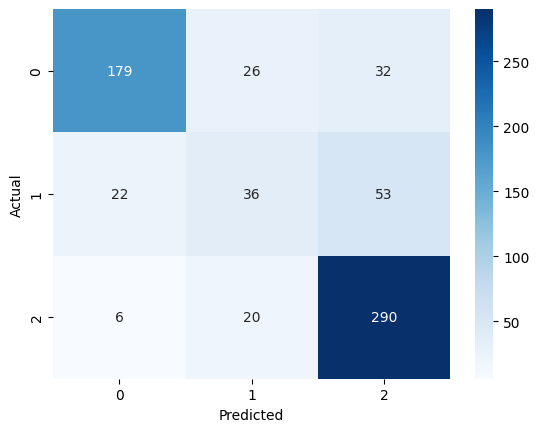

In [34]:
# Classificaiton Report and Confusion Matrix
model.eval()
all_preds = []
all_labels = []

with torch.inference_mode():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    preds = torch.argmax(outputs, dim = 1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(y_batch.cpu().numpy())

print("\n Classificaiton Report:")
print(classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()